## TP2: Implementação do Algoritmo de Boosting - Enunciado
### Descrição
Sabemos que erros de um modelo de previsão podem ser decompostos em dois fatores: viés e variância. Um modelo complexo apresenta pouco viés, mas grande variância, enquanto um modelo simples apresenta grande viés e pouca variância.
Boosting é o processo de reduzir o viés de um grande conjunto de modelos simples (i.e., com baixa variância). Esses modelos são chamados de modelos fracos, e são levemente correlacionados com a classifição correta. No processo de Boosting, os modelos fracos formam um modelo mais forte de maneira iterativa. Os modelos fracos são escolhidos iterativamente, de forma que cada modelo é escolhido levando-se em conta viéses independentes. Ou seja, cada modelo componente realiza erros diferentes de outros modelos componentes.
### Objetivo
Nosso foco neste trabalho prático é ganhar experiência com o processo de Boosting. Você deverá implementar o processo de Boosting (visto em sala de aula) assumindo um problema de classificação binária com atributos categóricos. Em particular, você deverá realizar os experimentos utilizando o dataset tic-tac-toe, disponível em https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame. Sua avaliação deverá seguir a metodologia de validação cruzada com 5 partições. A medida de eficácia a ser considerada é a taxa de erro simples. Você deverá implementar todo o processo de Boosting, e portanto não é permitido utilizar soluções prontas (embora não seja necessário implementar funções básicas). A escolha da linguagem
de programação é uma decisão do aluno.
### Entregáveis
Você deverá entregar, via Moodle da disciplina e dentro do prazo, arquivo contendo o código fonte do programa desenvolvido, bem como a documentação. A documentação deve conter toda a informação referente a suas escolhas de implementação. Além disso, você deverá fazer uma série de análises de erro, e reportar os resultados obtidos. Os gráficos a serem apresentados devem refletir experimentos que avaliem aspectos relacionados ao processo de Boosting, como por exemplo o número de iterações.

In [1]:
# Muda a pasta de execução para a raíz do projeto.
# Facilida import do algoritmo e leitura dos dodos.
import os
from pathlib import Path
os.chdir(f"{Path.cwd().parent}")

A implementação do Adaboost se encontra no arquivo Adaboost.py, na pasta adaboost, que pode ser encontrada na raíz do projeto

In [2]:
# Import do Adaboost (Checar arquivo AdaBoost.py para ver implementação).
from adaboost import AdaBoost

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# Leitura do dado.
df_tic_tac_toe = pd.read_csv("data/tic-tac-toe.data")
df_tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [5]:
df_tic_tac_toe.shape

(957, 10)

In [6]:
# Aplicando one-hot-encoding para as variáveis, já que podemos ter 3 valores em cada coluna,
# Precisamos torná-las variáveis binárias.
x = pd.get_dummies(df_tic_tac_toe.drop(columns=['positive']))
x.head()

,x_b,x_o,x_x,x.1_b,x.1_o,x.1_x,x.2_b,x.2_o,x.2_x,x.3_b,...,o.1_x,x.4_b,x.4_o,x.4_x,o.2_b,o.2_o,o.2_x,o.3_b,o.3_o,o.3_x
0,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
1,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
2,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
3,False,False,True,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False


In [7]:
x = x.values

![title](imgs/weights_update.png)

In [8]:
# Transforma o target em -1 e 1, para se adequar à forma como os pesos são calculados no algoritmo Adaboost.
y = df_tic_tac_toe['positive'].replace({"positive": 1, "negative": -1})
y.head()

0    1
1    1
2    1
3    1
4    1
Name: positive, dtype: int64

In [9]:
y = y.values

In [10]:
# Aplica-se um Repeated Stratified K-Fold para fazer uma validação cruzada.
# Escolheu-se utilizar o K-Fold estratificado para evitar desbalanceamento de classes nos folds.
# Foi utilizado o Repeated K-Fold para fazer uma estimativa mais precisa do resultado do modelo.
# Pois é feita uma validação cruzada repetidas vezes com folds randomizados.
# Foi realizada uma validação cruzada com 5 folds 3 vezes.
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
training_score_histories = list()
test_score_histories = list()
for train_index, test_index in rkf.split(x, y):
    adaboost = AdaBoost(n_stumps=500)
    training_score_history, test_score_history = adaboost.fit(x[train_index], y[train_index], x_test=x[test_index], y_test=y[test_index])
    training_score_histories.append(training_score_history)
    test_score_histories.append(test_score_history)

In [11]:
# Faz a média do histórico dos score de treino e teste por fold e repetição.
# Para cada valor de número de Stumps.
training_score_history_fold_mean = np.array(training_score_histories).mean(axis=0)
test_score_history_fold_mean = np.array(test_score_histories).mean(axis=0)

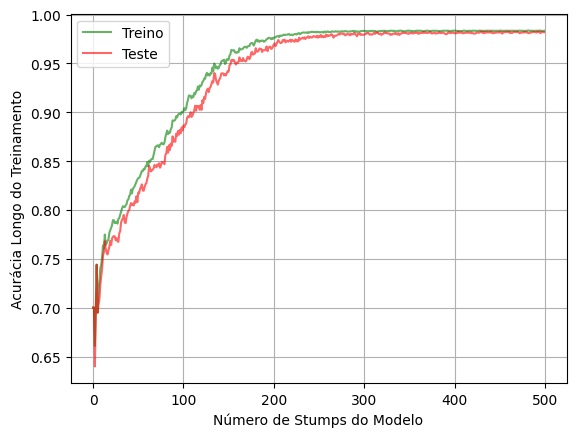

In [12]:
sns.lineplot(training_score_history_fold_mean, label="Treino", color="green", alpha=0.6)
sns.lineplot(test_score_history_fold_mean, label="Teste", color="red", alpha=0.6)
plt.ylabel("Acurácia Longo do Treinamento")
plt.xlabel("Número de Stumps do Modelo")
plt.grid()
plt.show()

In [13]:
print(f"Acurácia final do modelo {test_score_history_fold_mean[-1]}")

Acurácia final do modelo 0.9818862710878418


- Pode-se perceber que a Acurácia estabiliza depois de um certo número de stumps (para de aumentar).
- Pode-se perceber também que, como é esperado do Adaboost, não há overfitting, os erros de treino e de teste não se afastam à medida que a complexidade do modelo aumenta.
- A acurácia do melhor modelo é bem melhor do que a do modelo com apenas um Stump. De 98% para 65% é uma diferença muito considerável.